In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import plot_tree

X_LIM = (0, 10)
Y_LIM = (0, 9)

def animl_plot_tree(data, tree):
    # First plot the tree
    plot_tree(tree, 
              feature_names=["feature1", "feature2"],
              class_names=["negative", "positive"],
              filled=True, impurity=False)

    # Then plot the data and boundary
    fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12, 4))

    def data_scatter(ax):
        pos_data = data[data["label"] == "positive"]
        neg_data = data[data["label"] == "negative"]
        ax.scatter(x=pos_data["feature1"], y=pos_data["feature2"],
                   c="blue", marker="+", s=100)
        ax.scatter(x=neg_data["feature1"], y=neg_data["feature2"],
                   c="orange", marker="x", s=100)
        ax.set_xlabel("feature1")
        ax.set_ylabel("feature2")
        ax.set_xlim(X_LIM)
        ax.set_ylim(Y_LIM)
                   
    # Plot data
    data_scatter(ax1)
    ax1.set_title("Synthetic Data")

    # Plot boundary
    DecisionBoundaryDisplay.from_estimator(
        tree, data[["feature1", "feature2"]], response_method="predict",
        xlabel="feature1", ylabel="feature2",
        alpha=0.1, colors=["orange", "black", "blue", "black"],
        ax=ax2)
    data_scatter(ax2)
    ax2.set_title("Decision Boundary")

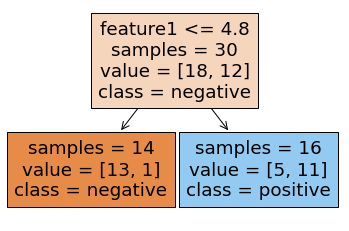

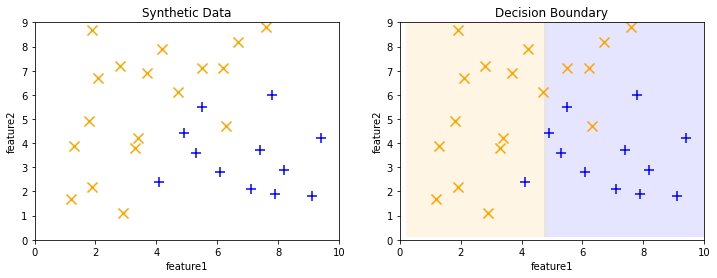

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("../book_source/source/classification/trees/synthetic.csv")

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data[["feature1", "feature2"]], data["label"])

animl_plot_tree(data, tree)

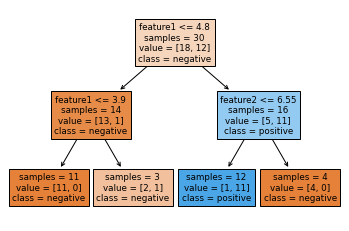

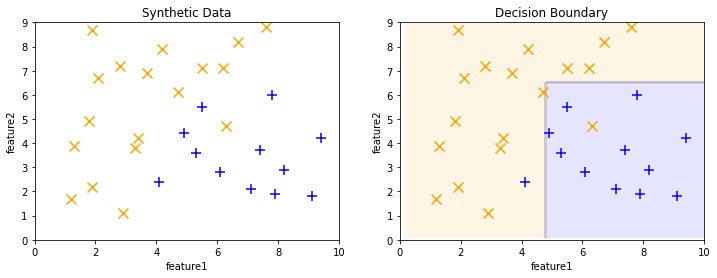

In [134]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data[["feature1", "feature2"]], data["label"])

animl_plot_tree(data, tree)

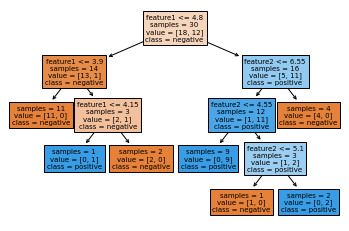

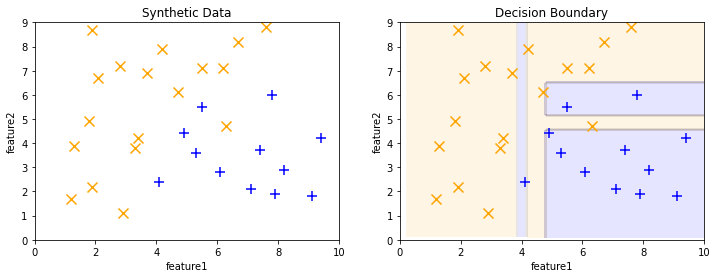

In [135]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(data[["feature1", "feature2"]], data["label"])

animl_plot_tree(data, tree)

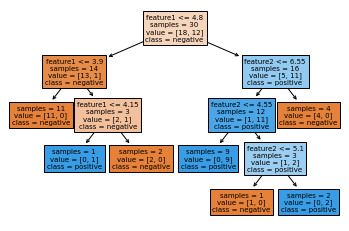

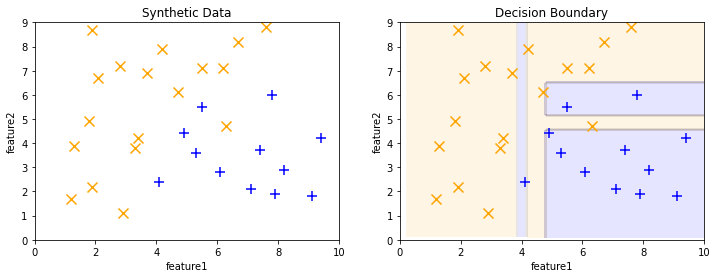

In [136]:
tree = DecisionTreeClassifier()
tree.fit(data[["feature1", "feature2"]], data["label"])

animl_plot_tree(data, tree)

# Regression

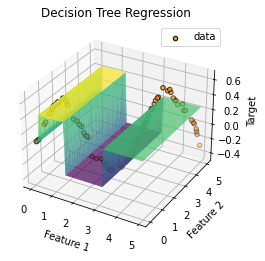

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from mpl_toolkits.mplot3d import Axes3D

# Generate some example data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 2), axis=0)
y = np.sin(X[:, 0]) * np.cos(X[:, 1])

# Fit a decision tree regressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Make predictions on a grid of test points
xx, yy = np.meshgrid(np.arange(0, 5, 0.05),
                     np.arange(0, 5, 0.05))
X_test = np.column_stack((xx.ravel(), yy.ravel()))
y_pred = regr_1.predict(X_test)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X_test[:, 0], X_test[:, 1], y_pred, linewidth=0.2, antialiased=True, cmap="viridis")
ax.scatter(X[:, 0], X[:, 1], y, s=20, c="darkorange", edgecolor="black", label="data")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


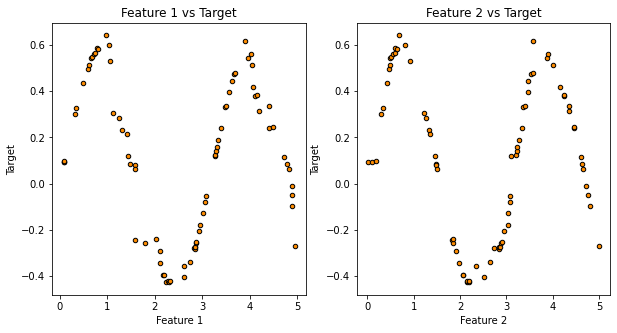

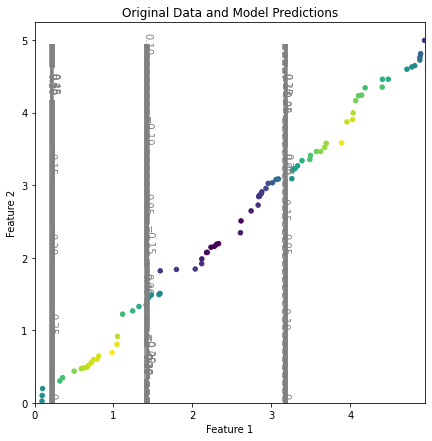

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate some example data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 2), axis=0)
y = np.sin(X[:, 0]) * np.cos(X[:, 1])

# Fit a decision tree regressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Make predictions on a grid of test points
xx, yy = np.meshgrid(np.arange(0, 5, 0.05),
                     np.arange(0, 5, 0.05))
X_test = np.column_stack((xx.ravel(), yy.ravel()))
y_pred = regr_1.predict(X_test)

# Plot the original data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X[:, 0], y, s=20, c="darkorange", edgecolor="black", label="data")
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Target')
axs[0].set_title('Feature 1 vs Target')
axs[1].scatter(X[:, 1], y, s=20, c="darkorange", edgecolor="black", label="data")
axs[1].set_xlabel('Feature 2')
axs[1].set_ylabel('Target')
axs[1].set_title('Feature 2 vs Target')

# Plot the model's predictions
fig2, ax2 = plt.subplots(figsize=(7, 7))
ax2.scatter(X[:, 0], X[:, 1], s=20, c=y, cmap="viridis")
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Original Data and Model Predictions')
cs = ax2.contour(xx, yy, y_pred.reshape(xx.shape), levels=15, colors='gray')
plt.clabel(cs, inline=1, fontsize=10)
plt.show()


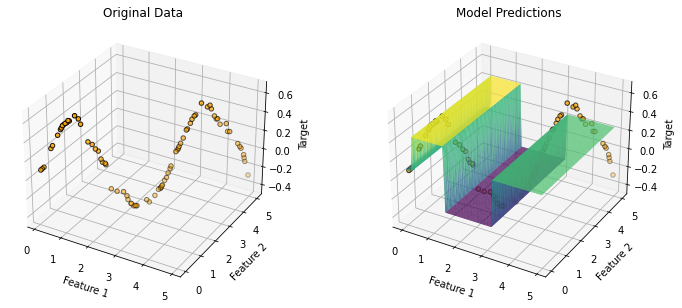

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from mpl_toolkits.mplot3d import Axes3D

# Generate some example data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 2), axis=0)
y = np.sin(X[:, 0]) * np.cos(X[:, 1])

# Fit a decision tree regressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Make predictions on a grid of test points
xx, yy = np.meshgrid(np.arange(0, 5, 0.05),
                     np.arange(0, 5, 0.05))
X_test = np.column_stack((xx.ravel(), yy.ravel()))
y_pred = regr_1.predict(X_test)

# Plot the original data
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c="orange", edgecolor="black")
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Target')
ax1.set_title('Original Data')

# Plot the model's predictions
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(X_test[:, 0], X_test[:, 1], y_pred, linewidth=0.2, antialiased=True, cmap="viridis")
ax2.scatter(X[:, 0], X[:, 1], y, c="orange", edgecolor="black")
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Target')
ax2.set_title('Model Predictions')
plt.show()


Text(0.5, 0, 'X1')

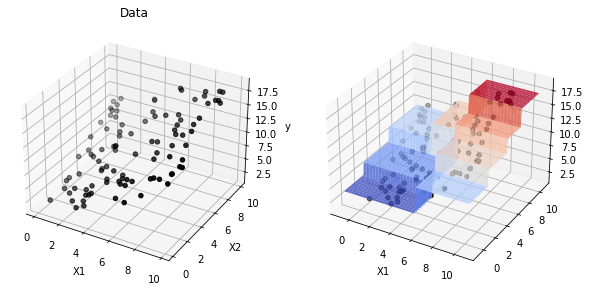

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor

# Generate some random data
np.random.seed(42)
X = np.random.rand(100, 2) * 10
y = X[:, 0] + X[:, 1] + np.random.normal(scale=0.5, size=100)

# Train a decision tree model
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

# Create a grid of points to visualize the predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data and the predictions
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, c='black', marker='o')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('y')
ax1.set_title('Data')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X[:, 0], X[:, 1], y, c='black', marker='o')
ax2.set_xlabel('X1')


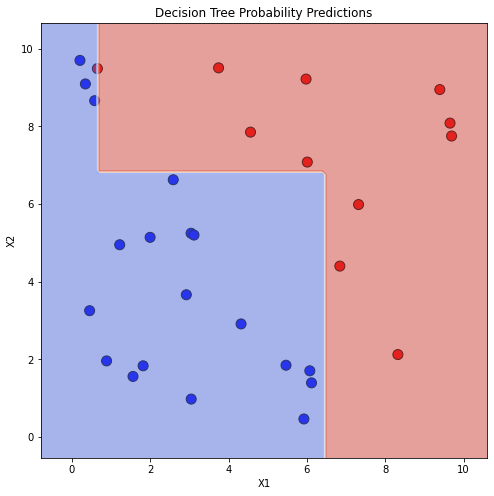

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Generate some random data
np.random.seed(42)
X = np.random.rand(30, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)

# Train a decision tree model
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Create a grid of points to visualize the predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = tree.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the data and the probability predictions
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Tree Probability Predictions')

plt.show()


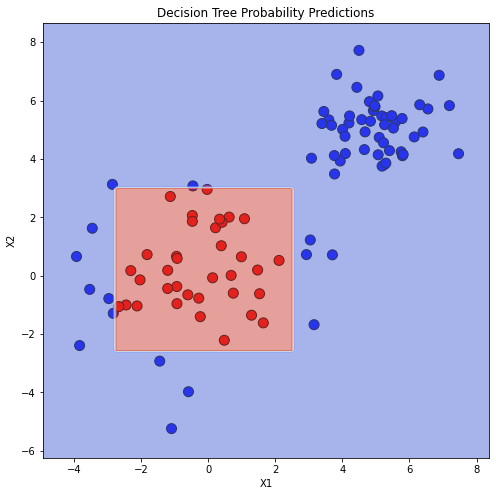

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Generate some random data with different distributions
np.random.seed(42)
X1 = np.random.normal(loc=0, scale=2, size=50)
X2 = np.random.normal(loc=0, scale=2, size=50)
X3 = np.random.normal(loc=5, scale=1, size=50)
X4 = np.random.normal(loc=5, scale=1, size=50)
X = np.vstack((np.column_stack((X1, X2)), np.column_stack((X3, X4))))
y = (X[:, 0] ** 2 + X[:, 1] ** 2 < 9).astype(int)

# Train a decision tree model
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Create a grid of points to visualize the predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = tree.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the data and the probability predictions
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Tree Probability Predictions')

plt.show()
